In [2]:
import pandas as pd
import os

In [3]:
os.chdir('/Users/zhouyu/Google Drive/python4work/')

In [4]:
dataset = pd.read_csv("all_image_excs.csv")

In [5]:
dataset.describe()

,id,imageName,imagePatchIndex,currentPatchLocation_1,currentPatchLocation_2,MeanRespOn,SEM,nodeid,leafid
count,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000
mean,29.785714,446.942857,15.142857,924.238095,541.655238,-99.566727,13.905558,9.904762,29.785714
std,17.584788,455.910717,8.788836,341.762287,180.122597,162.868159,16.287202,5.914104,17.584788
min,1.000000,152.000000,1.000000,241.000000,169.000000,-1163.746943,0.000000,1.000000,1.000000
25%,14.000000,152.000000,7.000000,672.000000,350.000000,-115.957922,4.287506,5.000000,14.000000
50%,30.000000,152.000000,15.000000,1023.000000,597.000000,-43.471412,10.340860,9.000000,30.000000
75%,45.000000,1151.000000,23.000000,1215.000000,689.000000,-13.527845,17.365962,14.000000,45.000000
max,60.000000,1151.000000,30.000000,1313.000000,856.000000,65.881422,167.933609,20.000000,60.000000


In [6]:
dataset.describe(include = ['object'])

,splitOnRecType,stimulusTag,splitOnExperimentDate,celllabel,splitOnDelTag
count,1050,1050,1050,1050,1050
unique,1,2,7,10,1
top,exc,intensity,2016/10/11,Cell2,keep
freq,1050,525,300,320,1050


In [7]:
del dataset['leafid']

In [9]:
dataset.columns

Index([u'id', u'splitOnRecType', u'stimulusTag', u'splitOnExperimentDate',
       u'imageName', u'imagePatchIndex', u'celllabel', u'splitOnDelTag',
       u'currentPatchLocation_1', u'currentPatchLocation_2', u'MeanRespOn',
       u'SEM', u'nodeid'],
      dtype='object')

In [10]:
dataset['cell_id'] = dataset['splitOnExperimentDate']+dataset['celllabel']

In [11]:
del dataset['splitOnExperimentDate']
del dataset['celllabel']
del dataset['splitOnDelTag']

In [13]:
dataset.rename(columns = {})

,id,splitOnRecType,stimulusTag,imageName,imagePatchIndex,currentPatchLocation_1,currentPatchLocation_2,MeanRespOn,SEM,cell_id
0,1,exc,image,152,1,1241,648,-735.528182,94.542819,2016/08/10Cell 1- on parasol
1,2,exc,intensity,152,1,1241,648,-673.196247,106.060358,2016/08/10Cell 1- on parasol
2,3,exc,image,152,2,679,707,-57.449961,20.437119,2016/08/10Cell 1- on parasol
3,4,exc,intensity,152,2,679,707,1.240314,16.791636,2016/08/10Cell 1- on parasol
4,5,exc,image,152,3,1287,606,-219.210550,34.398637,2016/08/10Cell 1- on parasol


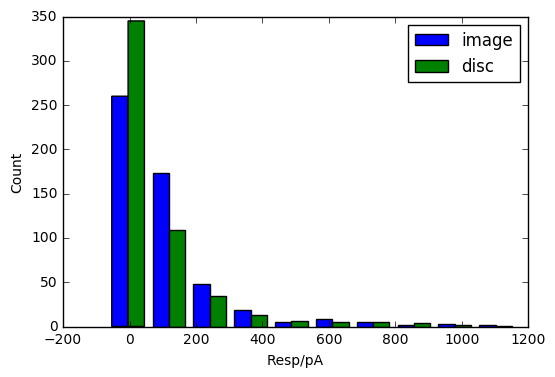

In [12]:
%matplotlib inline
import matplotlib.pylab as plt
image_resp = dataset[dataset['stimulusTag'] == 'image']['MeanRespOn']
disc_resp = dataset[dataset['stimulusTag']=='intensity']['MeanRespOn']
plt.hist([-image_resp,-disc_resp],label=['image','disc'])
plt.legend()
plt.xlabel('Resp/pA')
plt.ylabel('Count')

/Users/zhouyu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


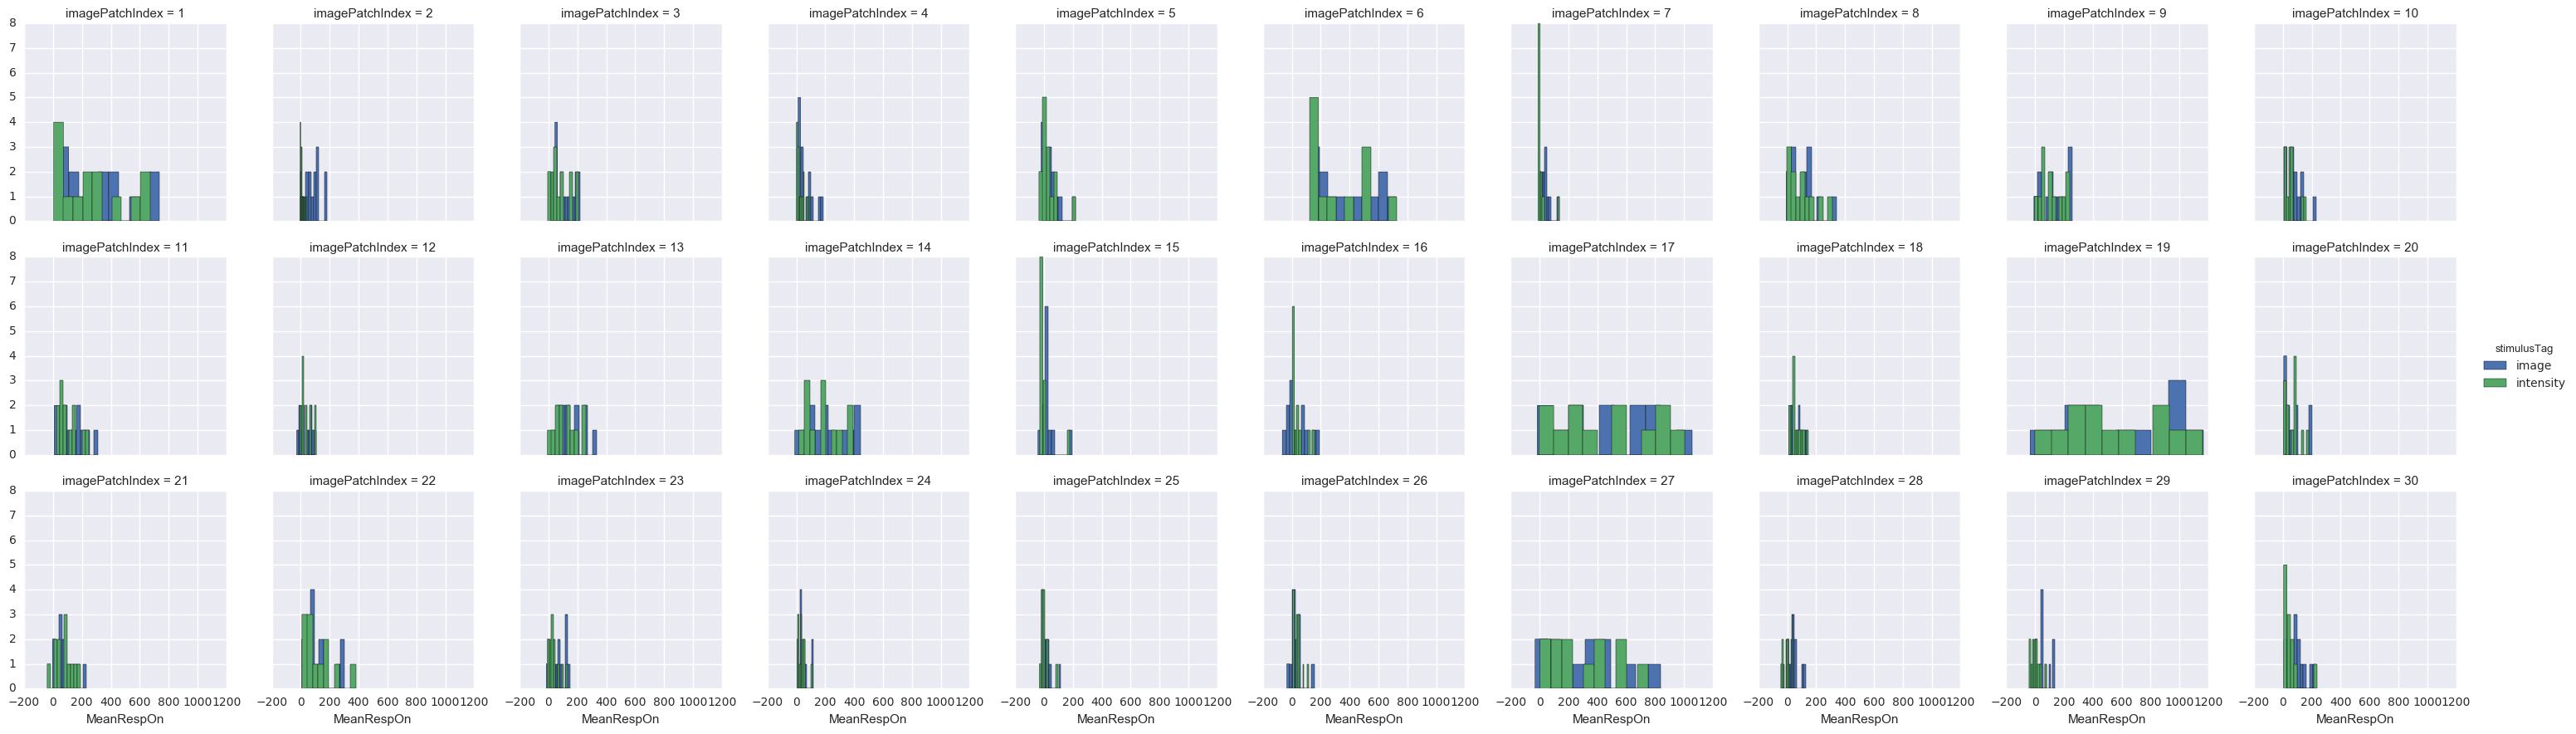

In [14]:
import seaborn as sns
# plot distribution per image patch
data_152 = dataset[dataset['imageName']==152]
data_152['MeanRespOn'] = -data_152['MeanRespOn']
g = sns.FacetGrid(data_152, col="imagePatchIndex", col_wrap = 10, hue="stimulusTag")
g.map(plt.hist, "MeanRespOn")
g.add_legend()

In [17]:
# for imageset 00152 plot scatter plot
grouped = data_152.groupby('stimulusTag')
grouped_img = grouped.get_group('image')[['imagePatchIndex','cell_id','MeanRespOn','SEM']]
grouped_img.rename(columns = {'MeanRespOn':'img_resp','SEM':'img_SEM'},inplace = True)
grouped_disc = grouped.get_group('intensity')[['imagePatchIndex','cell_id','MeanRespOn','SEM']]
grouped_disc.rename(columns = {'MeanRespOn':'disc_resp','SEM':'disc_SEM'},inplace = True)
img_disc = pd.merge(grouped_img,grouped_disc,on = ['imagePatchIndex','cell_id'])

In [18]:
img_disc.head(5)

,imagePatchIndex,cell_id,img_resp,img_SEM,disc_resp,disc_SEM
0,1,2016/08/10Cell 1- on parasol,735.528182,94.542819,673.196247,106.060358
1,2,2016/08/10Cell 1- on parasol,57.449961,20.437119,-1.240314,16.791636
2,3,2016/08/10Cell 1- on parasol,219.210550,34.398637,208.716175,34.548486
3,4,2016/08/10Cell 1- on parasol,43.472015,13.222489,15.402639,10.396487
4,5,2016/08/10Cell 1- on parasol,1.750184,5.143692,65.967056,12.297134


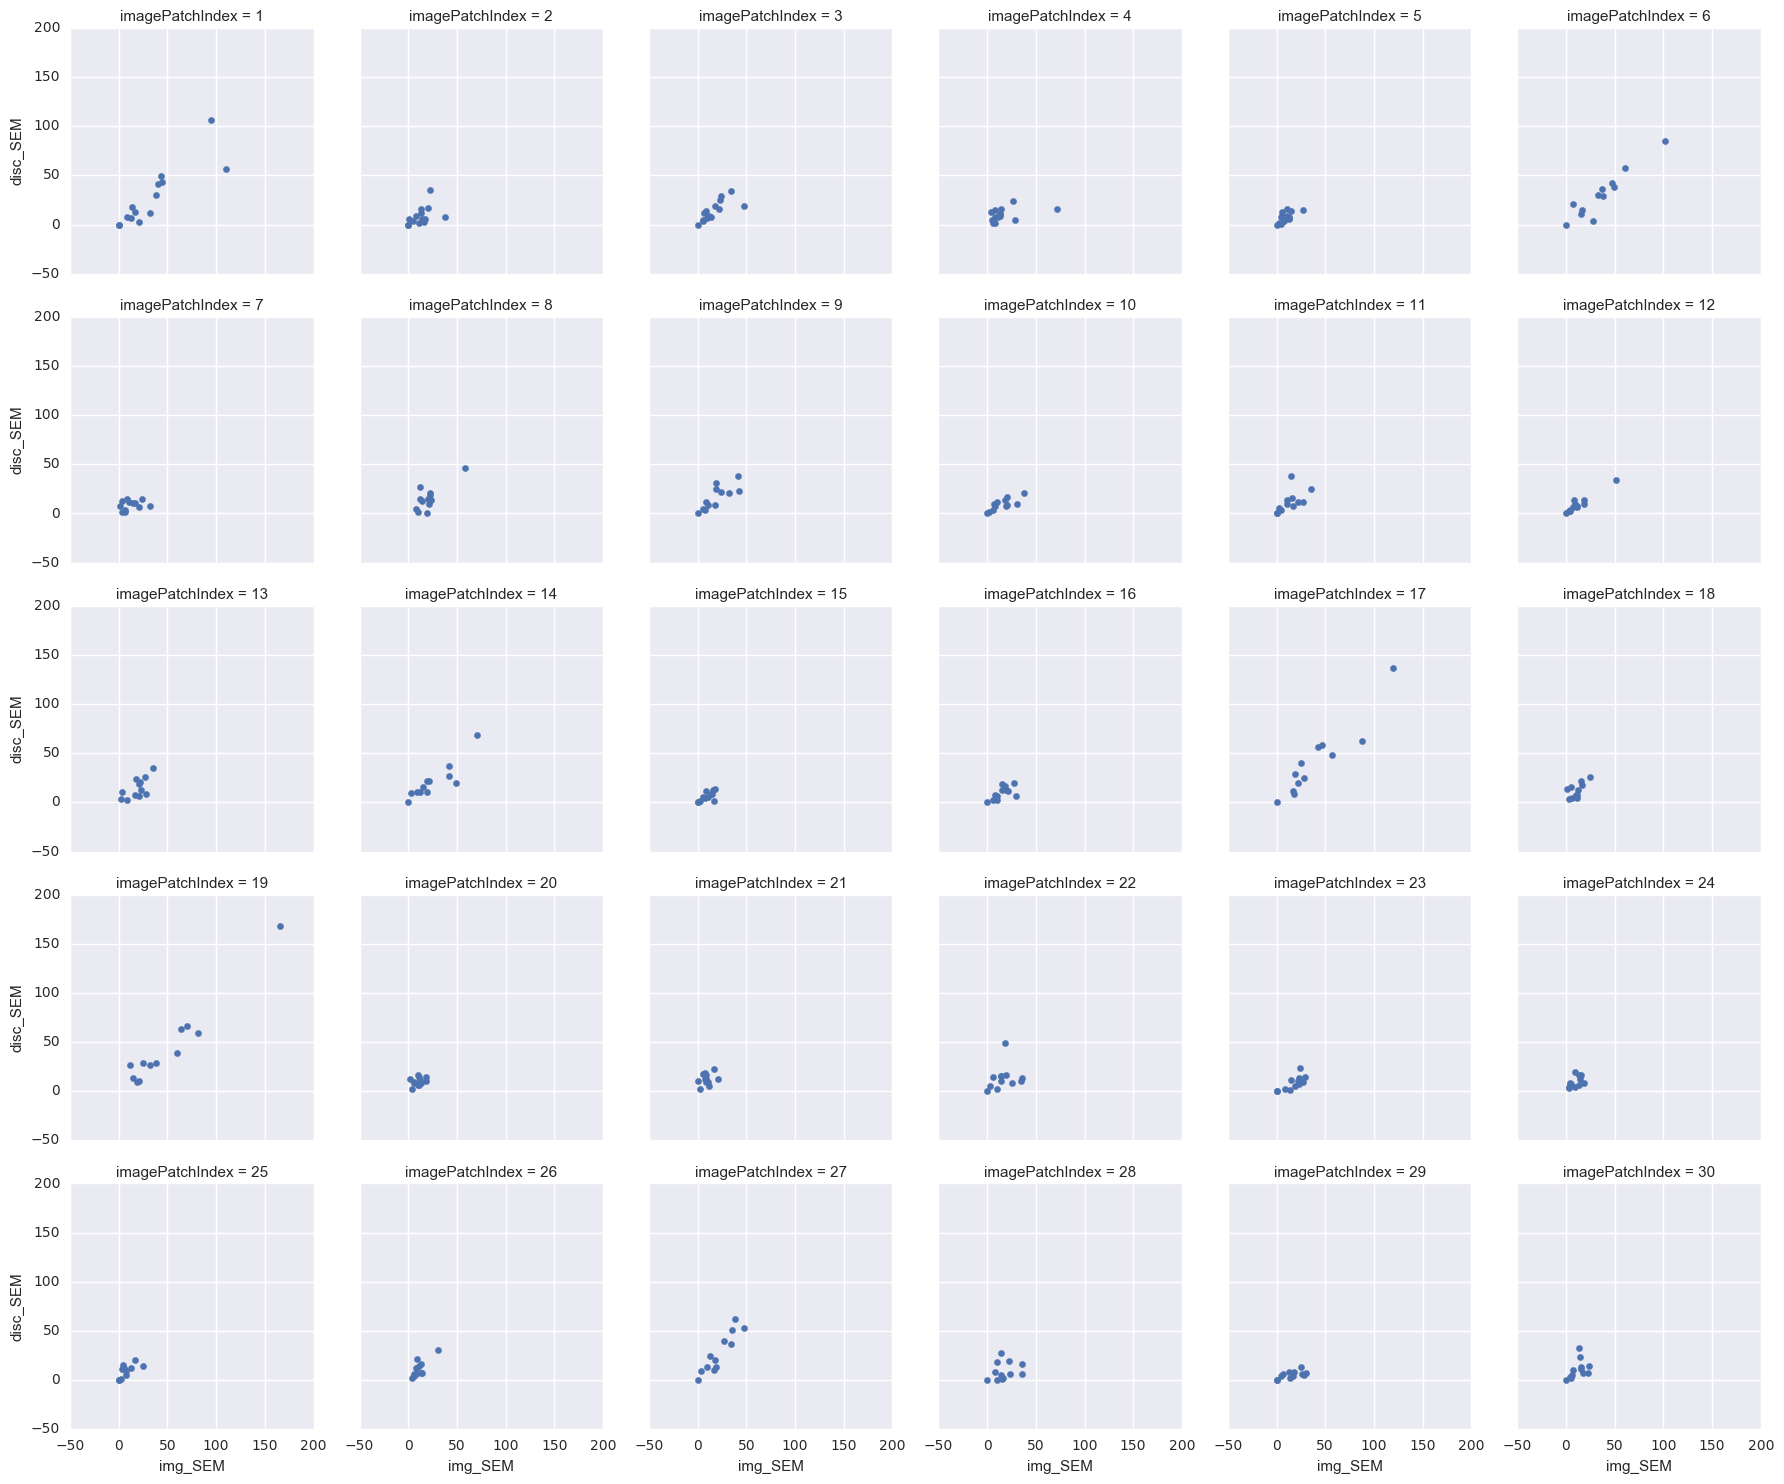

In [21]:
def normedplot(x,y,**kwargs):
    m = max(max(x),max(y))
    x = x/m
    y = y/m
    plt.scatter(x,y,**kwargs)
g = sns.FacetGrid(img_disc, col="imagePatchIndex", col_wrap = 6)
g.map(plt.scatter,"img_SEM","disc_SEM")
#g.set(xlim = (-0.5,1.5),ylim = (-0.5,1.5))